## Figure 2: Switches to HSI Status
from White Flight in Higher Education? Racial Status Hierarchies and the Establishment of Hispanic-Serving Institutions

by Laura Hamilton, Charlie Eaton, and Simon Cheng

In [1]:
quietly {

set scheme plotplain
    
use data/hdef19902019, clear
keep if ftfeftotlt>100 & ftfeftotlt<.
    
**Create separate unitid for Benjamin Franklin Institute for when it goes from Public to Private
    **Correct IPEDS reporting error to note it is private in 2016 & 2017
replace unitid=unitid+1000000 if unitid==165884 & year>2007
    replace control=2 if unitid==1165884
    
*replace Boricuo college Latinx enrollment as missing for years 1993 & 1994
    * when reporting error reduced % Latinx from 95% to 0%
replace tefhispt=. if unitid==189413 & year<1995 & year>1992
    
foreach var in efbkaat efhispt efwhitt efaiant efasiat {
quietly    gen pctt`var'= t`var' / teftotlt * 100
quietly gen lnftf`var'=log(ftf`var')
    quietly gen lnt`var'=log(t`var')
}

**More robust would be discontinuity
quietly gen hispserve=0 if pcttefhispt!=.
quietly replace hispserve=1 if pcttefhispt>=25 & pcttefhispt<.

xtset unitid year

**create var for year in which event occurs observation year of event for subject**
by unitid: gen transition=year if hispserv==1 & l.hispserv==0

**create var for year in which event occurs in all observations for all years for subject**
by unitid: egen hispserveyear = min(transition)

}

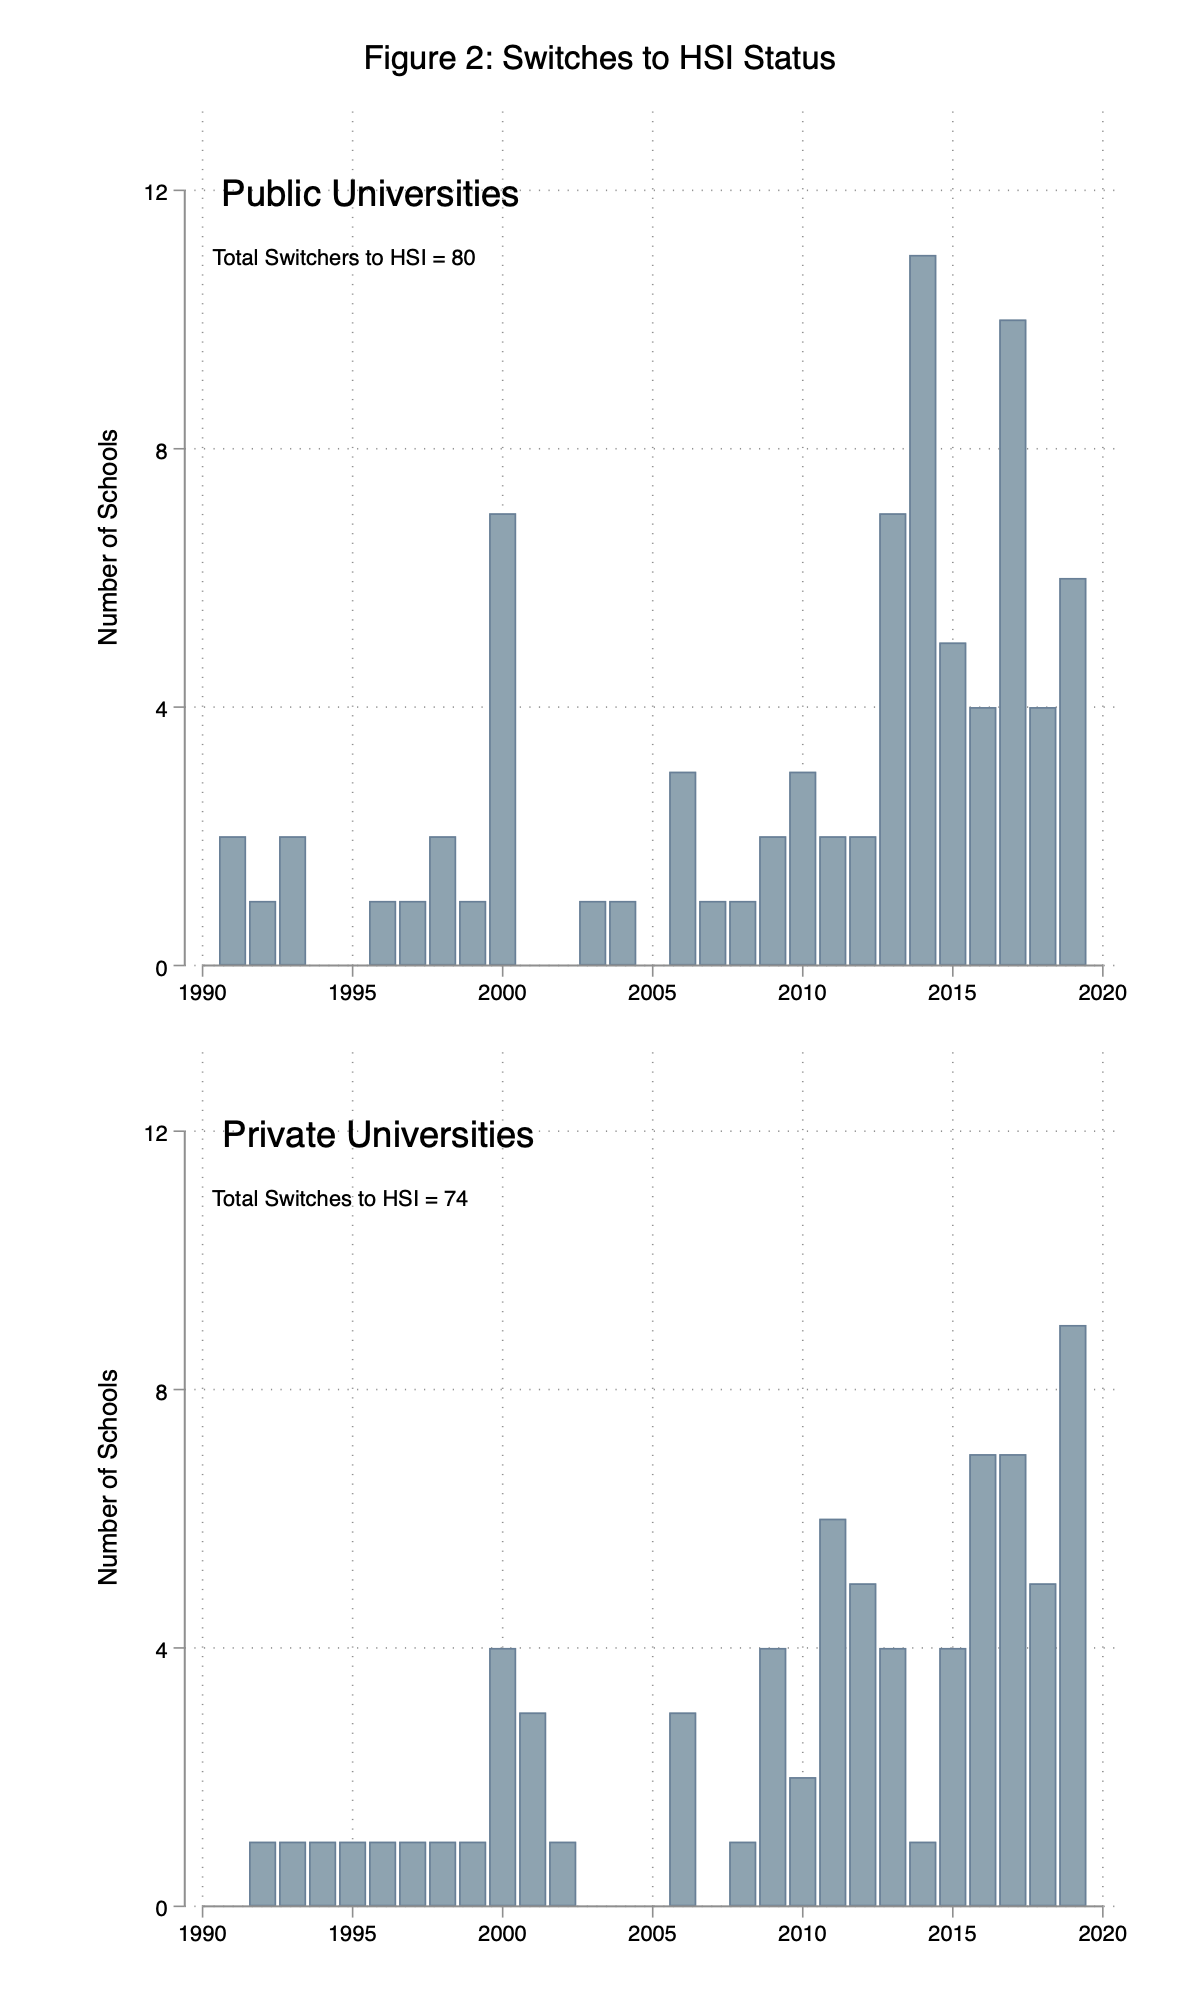

In [4]:
qui histogram hispserveyear if hispserveyear==year & control==1, discrete freq barwidth(.9) color(emidblue) fcolor(edkblue) ///
        xtitle("") xlabel(1990(5)2020) ///
        ytitle("Number of Schools") ylabel(0 4 8 12,grid) yscale(range(0 13)) /// 
        text(12 1990 "Public Universities", place(e) size(large)) ///
        text(11 1990 "Total Switchers to HSI = 80", place(e) size(small)) ///
        title("", size(medium) position(7)) ///
        name(pub, replace)

qui histogram hispserveyear if hispserveyear==year & control==2, discrete freq barwidth(.9) color(emidblue) fcolor(edkblue) ///
        xtitle("") xlabel(1990(5)2020) ///
        ytitle("Number of Schools") ylabel(0 4 8 12,grid) yscale(range(0 13)) /// 
        text(12 1990 "Private Universities", place(e) size(large)) ///
        text(11 1990 "Total Switches to HSI = 74", place(e) size(small)) ///
        title("", size(medium) position(7)) ///
        name(pri, replace)

    graph combine pub pri, /// 
        title("Figure 2: Switches to HSI Status", size(small) pos(12) margin(small) justification(center)) ///
        col(1) xsize(6) ysize(10) iscale(*.9) imargin(medsmall) graphregion(margin(l=5 r=5)) 

qui graph export figures/f2_switchestohsi.pdf, replace